# Importing Libraries and Files

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import model_from_json
import matplotlib.pyplot as plt
import matplotlib
import brewer2mpl
import numpy as np
import pandas as pd
import os
import time
import csv
import tensorflow as tf
import numpy as np
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from skimage import data, filter
import pandas as pd
data=pd.read_csv("fer2013.csv")
%matplotlib inline

Using TensorFlow backend.
C:\Users\OM\Anaconda3\envs\tenserflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\OM\Anaconda3\envs\tenserflow\lib\site-packages\skimage\filter\__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


# Loading CNN Model

In [2]:
# load json and create model
json_file = open('data/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into model
model.load_weights('data/model_weights.h5')

# Model Summary

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 20, 64)        256       
__________

In [4]:
image_x=[] #image pixel values
data.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [6]:
x_train=data[:28709]
x_train=data['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
X=np.vstack(x_train.values)/255
X=X.astype(np.float32)
x = data['pixels']
y = data['emotion']
from sklearn.preprocessing import MultiLabelBinarizer
y=MultiLabelBinarizer().fit_transform(y.reshape(-1, 1))

C:\Users\OM\Anaconda3\envs\tenserflow\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


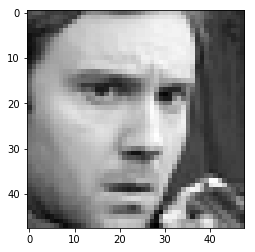

In [7]:
image=np.array(X[0])
image = np.reshape(image, (48, 48))
plt.imshow(image,cmap='gray')

# Data Visualization

In [8]:
def overview(start, end, X):
    fig = plt.figure(figsize=(10,10))
    for i in range(start, end+1):
        input_img = np.array(X[i])
        input_img = np.reshape(input_img, (48, 48))
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

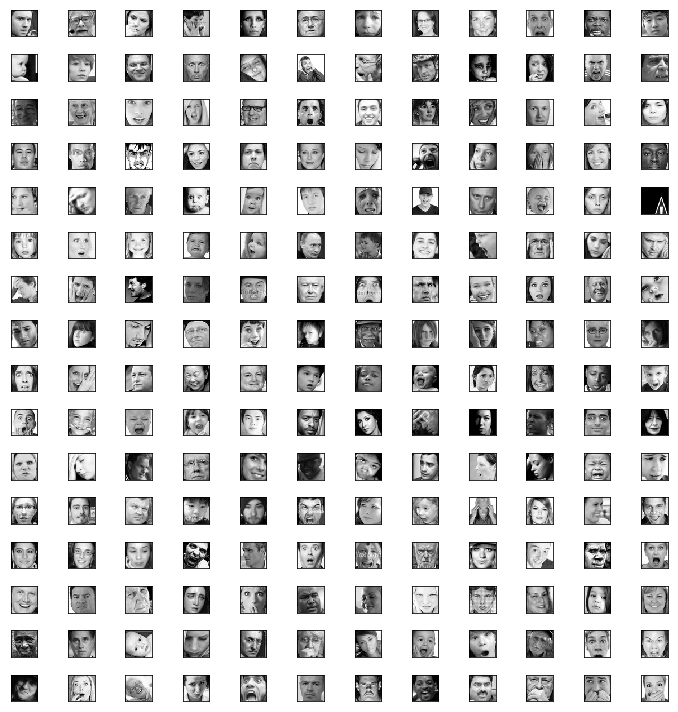

In [9]:
overview(0,191, X)

In [10]:
print(len(X),len(y))
x,x_validate,y,y_validate = X[:28708],X[32298:],y[:28708],y[32298:]
x = x.reshape(-1,48,48,1)
x_validate = x_validate.reshape(-1,48,48,1)
print(x.shape,y.shape,x_validate.shape,y_validate.shape)

35887 35887
(28708, 48, 48, 1) (28708, 7) (3589, 48, 48, 1) (3589, 7)


# Model Accuracy 

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
score = model.evaluate(x_validate, y_validate, verbose=0)
score1 = model.evaluate(x, y, verbose=0)
print ("Training %s: %.2f%%" % (model.metrics_names[1], score1[1]*100))
print ("Test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Training acc: 97.08%
Test acc: 62.16%


# Prediction Result

In [12]:
y_prob = model.predict(x, batch_size=128, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

In [13]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(20,20))
    emotion = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise',6:'Neutral'}
    for i in range(int(start), int(end+1)):
        input_img = np.array(X[i])
        input_img = np.reshape(input_img, (48, 48))
        ax = fig.add_subplot(6,3,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=14)
        if title:
            plt.title(emotion[y_pred[i]], color='green')
        plt.tight_layout()
    plt.show()

In [14]:
def plot_probs(start,end, y_prob):
    fig = plt.figure(figsize=(20,40))
    for i in range(int(start), int(end+1)):
        input_img = np.array(X[i])
        input_img = np.reshape(input_img, (48, 48))
        ax = fig.add_subplot(6,3,i+1)
        ax.bar(np.arange(0,7), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.3,7.5,1))
        labels = ['angry', 'disgust', 'fear', 'happy', 'sad','surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=14)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [15]:
def plot_subjects_with_probs(start, end, y_prob):
    iter = (end - start)/3
    for i in np.arange(0,iter):
        plot_subjects(i*3,(i+1)*3-1, y_pred, y_true, title=False)
        plot_probs(i*3,(i+1)*3-1, y_prob)

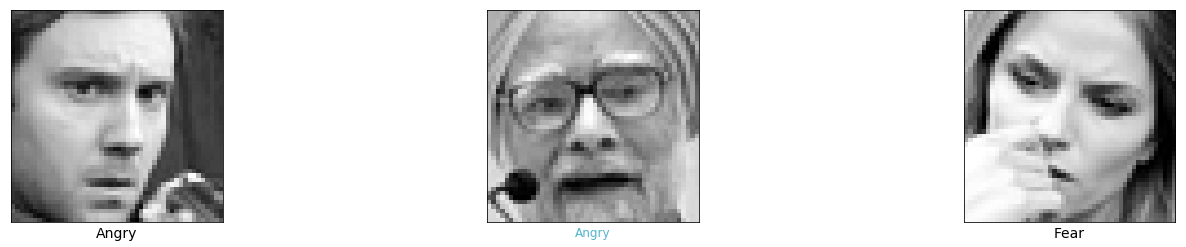

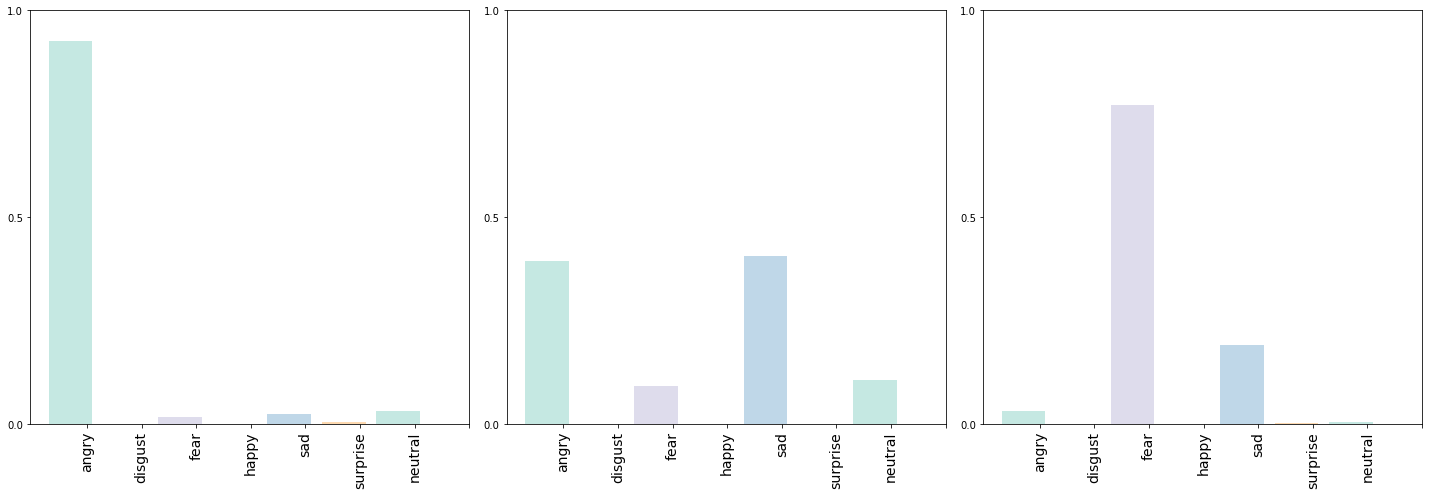

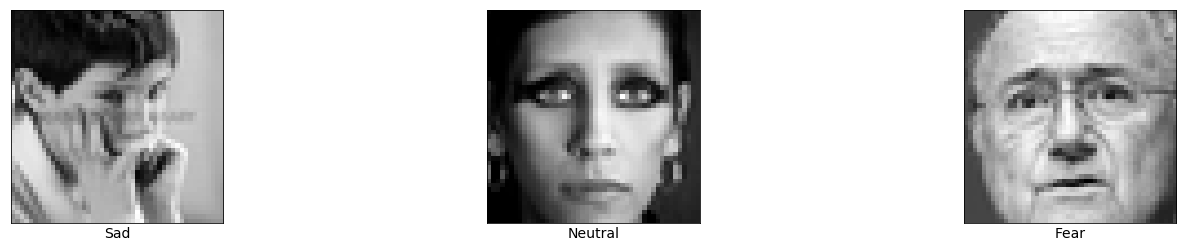

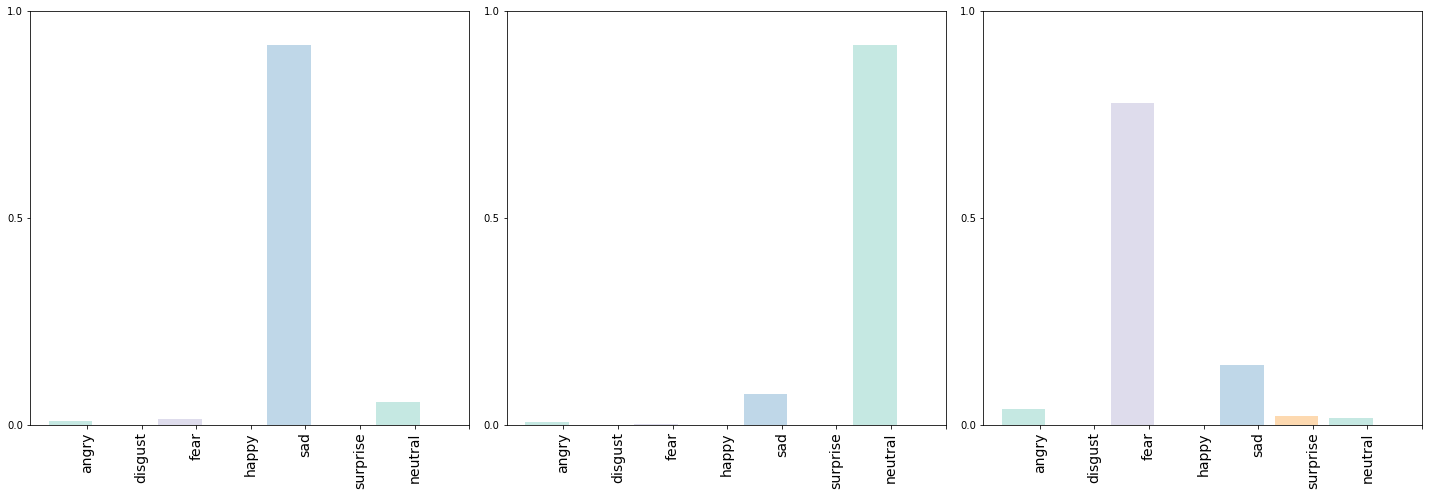

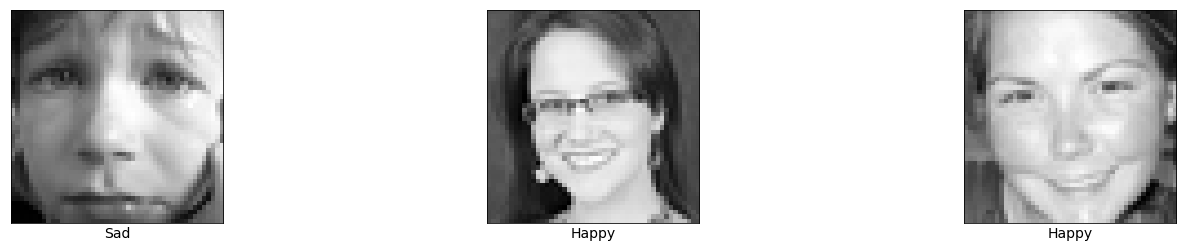

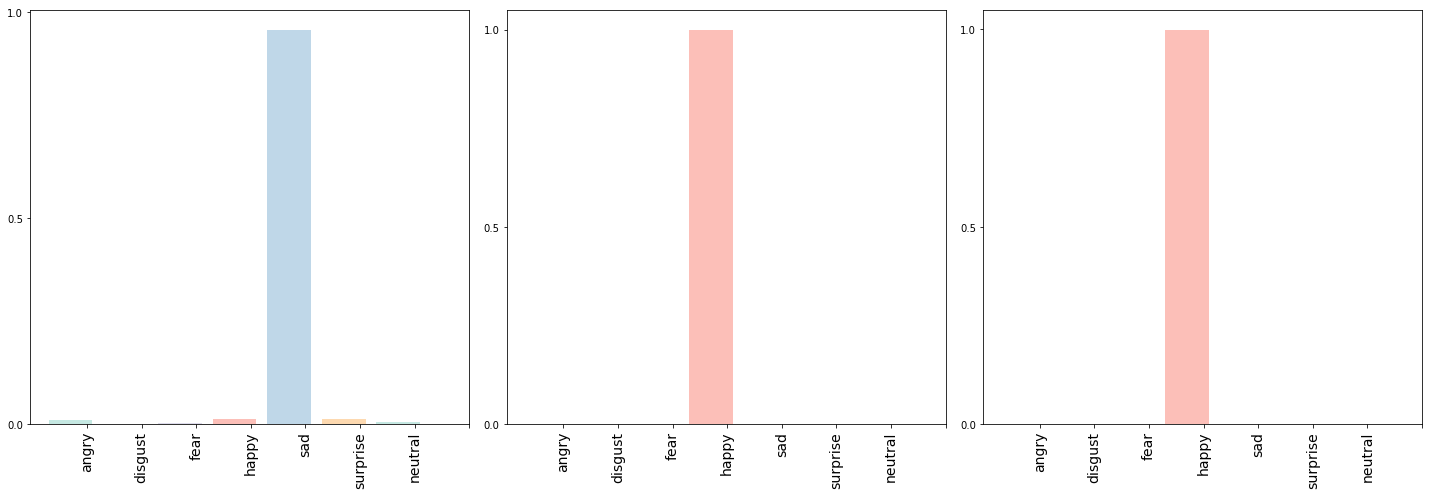

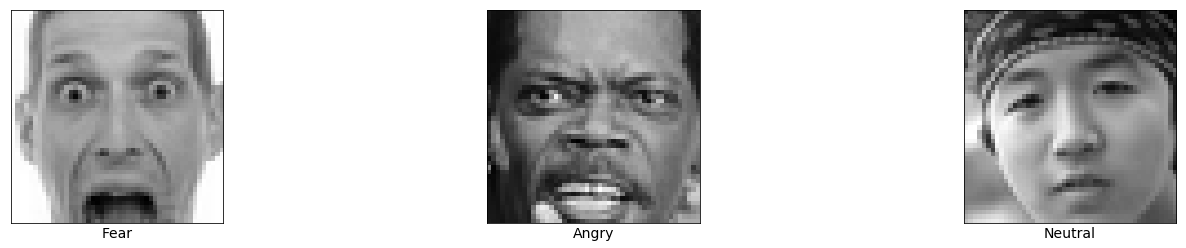

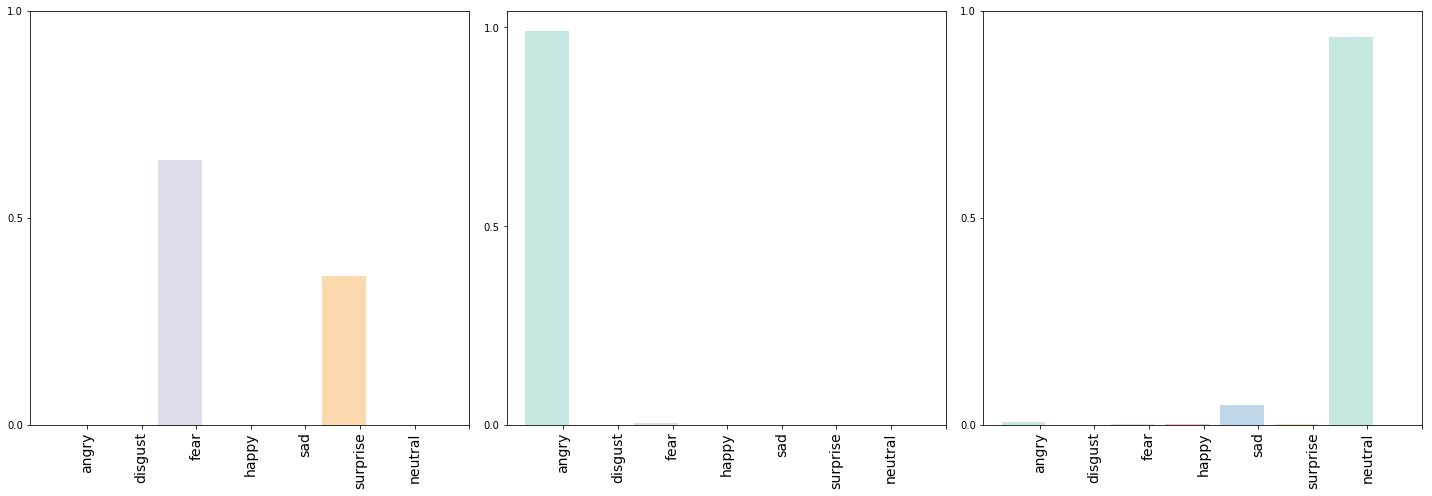

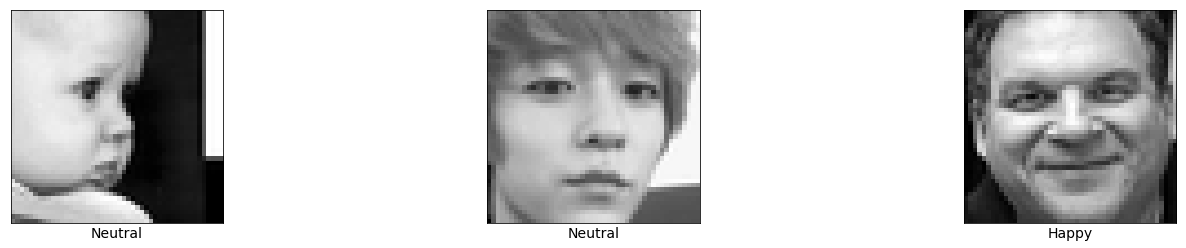

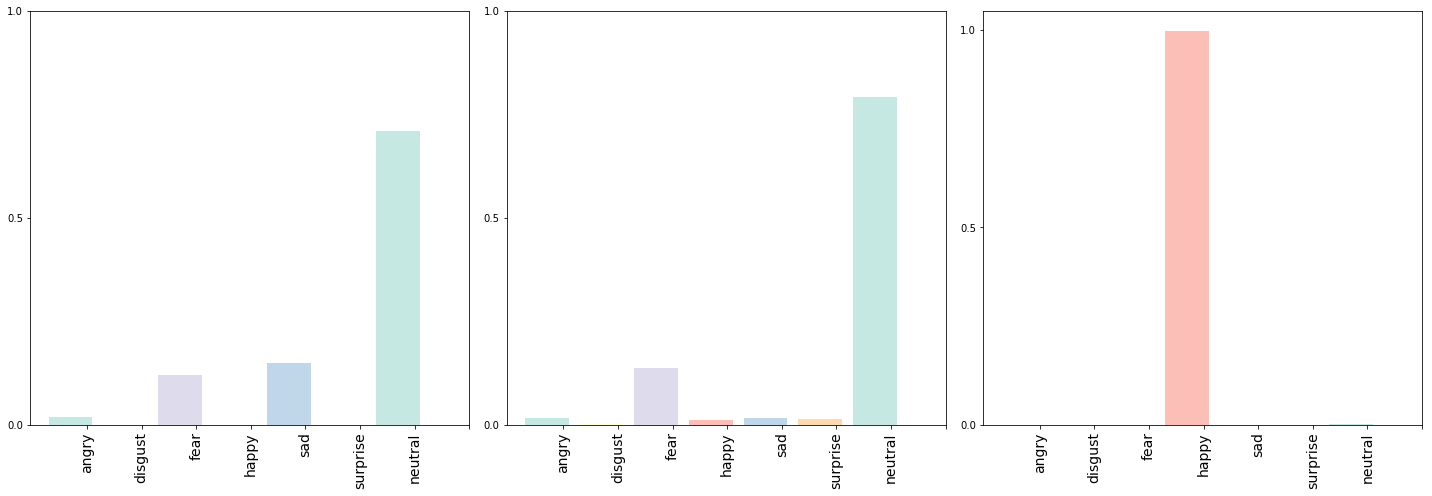

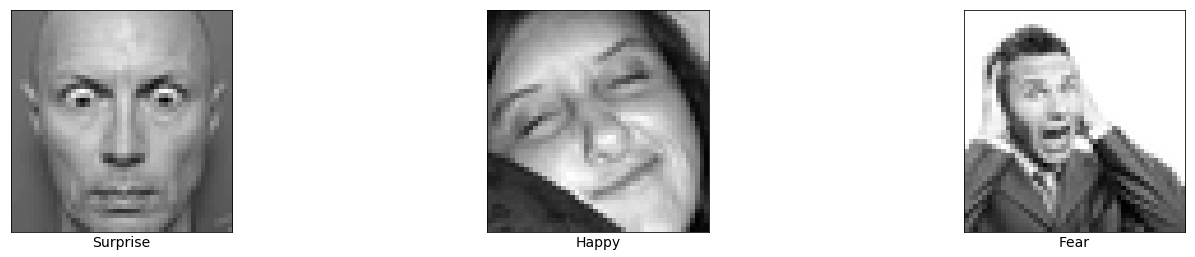

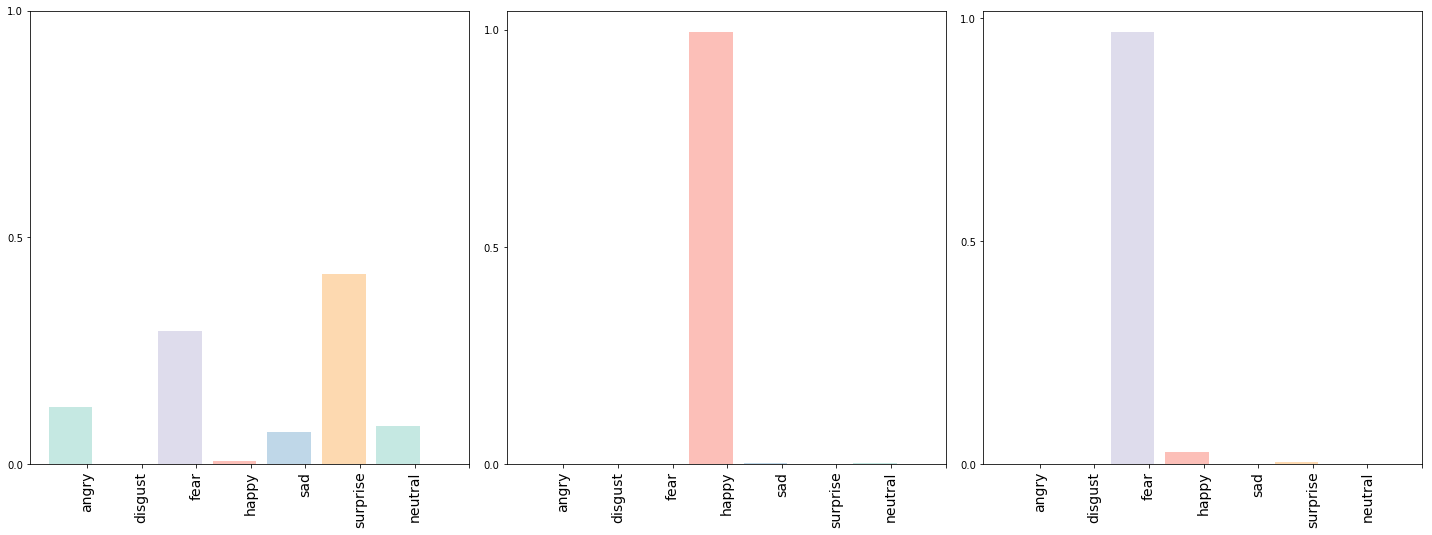

In [16]:
set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors

plot_subjects_with_probs(0, 18, y_prob)

# Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    labels = ['angry', 'disgust', 'fear', 'happy', 'sad','surprise','neutral']
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

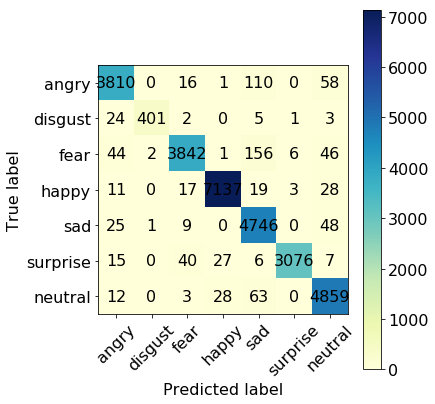

In [18]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

# Training Classification Metrics

In [21]:
labels = ['angry', 'disgust', 'fear', 'happy', 'sad','surprise','neutral']
def class_precision(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    col = [cm[j,i] for j in range(0,7)]
    return float(col[i])/sum(col)

def class_recall(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    row = [cm[i,j] for j in range(0,7)]
    return float(row[i])/sum(row)

def class_accuracy(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    tp = cm[i,i]
    fn = sum([cm[i,j] for j in range(0,7) if j != i])
    fp = sum([cm[j,i] for j in range(0,7) if j != i])
    tn = sum([cm[i,j] for j in range(0,7) for i in range(0,7)]) -(tp+fp+fn)
    return float(tp + tn)/sum([tp, fn, fp, tn])

In [22]:
for emotion in labels:
    print (emotion.upper())
    print ('   acc = {}'.format(class_accuracy(y_true, y_pred, emotion)))
    print ('  prec = {}'.format(class_precision(y_true, y_pred, emotion)))
    print ('recall = {}\n'.format(class_recall(y_true, y_pred, emotion)))

ANGRY
   acc = 0.9889926152988714
  prec = 0.9667597056584624
recall = 0.9536921151439299

DISGUST
   acc = 0.9986763271561934
  prec = 0.9925742574257426
recall = 0.9197247706422018

FEAR
   acc = 0.9880869444057405
  prec = 0.9778569610587936
recall = 0.9377593360995851

HAPPY
   acc = 0.9952974780548975
  prec = 0.9920767306088407
recall = 0.9891891891891892

SAD
   acc = 0.9846035948167758
  prec = 0.9296767874632713
recall = 0.9828121764340443

SURPRISE
   acc = 0.996342482931587
  prec = 0.9967595593000648
recall = 0.9700409965310628

NEUTRAL
   acc = 0.9896892852166643
  prec = 0.9623687858981976
recall = 0.97865055387714



In [24]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred, target_names=labels))

             precision    recall  f1-score   support

      angry       0.97      0.95      0.96      3995
    disgust       0.99      0.92      0.95       436
       fear       0.98      0.94      0.96      4097
      happy       0.99      0.99      0.99      7215
        sad       0.93      0.98      0.96      4829
   surprise       1.00      0.97      0.98      3171
    neutral       0.96      0.98      0.97      4965

avg / total       0.97      0.97      0.97     28708



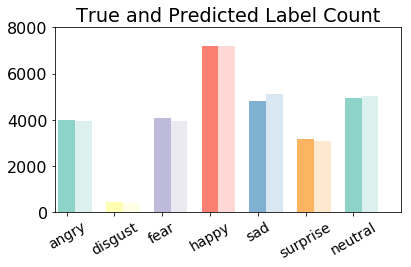

In [34]:
def plot_distribution(y_true, y_pred):
    ind = np.arange(1.5,8,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=set3, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=set3, alpha=0.3)
    ax.set_xticks(np.arange(1.5,8,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 8.5])
    ax.set_ylim([0, 8000])
    ax.set_title('True and Predicted Label Count')
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_true, y_pred)

# Overview of Training and Testing Labels

In [47]:
y_train_labels  = [np.argmax(lst) for lst in y]
y_public_labels = [np.argmax(lst) for lst in y_validate]
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,8), np.bincount(y1), color=set3, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,8), np.bincount(y2), color=set3, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()

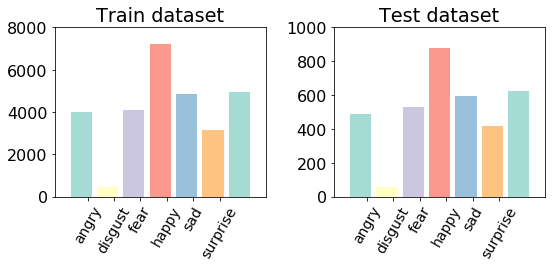

In [49]:
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train dataset', 'Test dataset'], \
                  ylims =[8000,1000]) 

# -----------------------------END------------------------------------------------